In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [3]:
def decision_function(Xcv):
  sample_output_rbf = 0
  y_predicted = []
  gamma = clf._gamma
  
  for x_q in Xcv:
    kernel_sum = 0
    for i in range(len(support_vectors)):
      squared_distance = (np.linalg.norm(support_vectors[i] - x_q)**2)
      rbf_k = np.exp(-gamma * (squared_distance))
      kernel_sum += dual_coeff[i]*rbf_k    
    
    sample_output_rbf = kernel_sum + intercept
    y_predicted.append(sample_output_rbf[0])
    
  return np.array(y_predicted)    
      

In [4]:
# Randomly initializing weights (w) and intercept values (b)
# dim — size of the w vector we want (or number of features or parameters in this case)
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias
    w — weights, a numpy array of size
    b — bias, a scalar
    '''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    # Above will initialize all w with 0.
    b = 0
    return w,b
  
def sigmoid(z):
    return 1.0/(1 + np.exp(-z)) 



def logloss(y_true, y_pred):
    
    len_y_true = len(y_true)
    
    number_of_plus = np.count_nonzero(y_true == 1)
    number_of_minus = np.count_nonzero(y_true == 0)
    
    # Plat scaling
    # we will calculate y+, y- based on data points in train data
    y_plus = (number_of_plus+1)/(number_of_minus+2)
    y_minus = 1/(number_of_minus+2)
    
    sum_of_loss = 0
    
    for i in range(0, len_y_true):
      if (y_true[i] == 1):
        sum_of_loss += ((y_plus * np.log10(y_pred[i])) + ((1- y_plus) * np.log10(1-y_pred[i])))
      else:
        sum_of_loss += ((y_minus * np.log10(y_pred[i])) + ((1 - y_minus) * np.log10(1-y_pred[i])))
        
    loss = (-1/len_y_true) * sum_of_loss  
    return loss
    
    
  
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw
  
  
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)

    return db

In [5]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    """ In this function, we will implement logistic regression"""
    # Here eta0 is learning rate
    # implement the code as follows
    # initialize the weights (call the initialize_weights(X_train[0]) function)
    w, b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = []
    test_loss = []
    N = len(X_train)

    loss_threshold = 0.0001

    for epoch in range(epochs):
        # for every data point(X_train,y_train)
        for row in range(N - 1):
            # compute gradient w.r.to w (call the gradient_dw() function)
            delta_weights = gradient_dw(
                X_train[row], y_train[row], w, b, alpha, len(X_train)
            )

            # compute gradient w.r.to b (call the gradient_db() function)
            delta_bias = gradient_db(X_train[row], y_train[row], w, b)

            # update w, b
            w = w + eta0 * delta_weights
            b = b + eta0 * delta_bias

        # predict the output of x_train[for all data points in X_train] using w,b
        # y_prediction_train is a numpy array (vector) containing all predictions (0/1) for the examples in X
        y_prediction_train = [  
        sigmoid(np.dot(w, x_row) + b) for x_row in X_train
        ]

        # compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        train_loss.append(logloss(y_train, y_prediction_train))

        # predict the output of x_test[for all data points in X_test] using w,b
        y_prediction_test = [
            sigmoid(np.dot(w, x_row) + b) for x_row in X_test
        ]

        print(
            f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
        )

        # compute the loss between predicted and actual values (call the loss function)
        test_loss.append(logloss(y_test, y_prediction_test))

      

    return w, b, train_loss, test_loss

In [6]:
alpha=0.0001
eta0=0.0001
# N=len(X_train)
epochs=50

w, b, cv_log_loss, test_loss = train(x_train, y_train, x_test, y_test, epochs, alpha, eta0)
print('w_coef ', w)
print('intercept b ', b)

For EPOCH No : 0 Train Loss is : 0.2744419344800745 and Test Loss is : 0.27396804375413747
For EPOCH No : 1 Train Loss is : 0.25388270599770685 and Test Loss is : 0.2530470672889054
For EPOCH No : 2 Train Loss is : 0.2378933473945702 and Test Loss is : 0.23678528686907455
For EPOCH No : 3 Train Loss is : 0.22535914670131452 and Test Loss is : 0.22404811138173356
For EPOCH No : 4 Train Loss is : 0.2154510564869265 and Test Loss is : 0.2139901088303104
For EPOCH No : 5 Train Loss is : 0.2075576774367939 and Test Loss is : 0.2059869660056321
For EPOCH No : 6 Train Loss is : 0.20122721364761822 and Test Loss is : 0.1995769993734065
For EPOCH No : 7 Train Loss is : 0.1961232499884324 and Test Loss is : 0.19441634384670936
For EPOCH No : 8 Train Loss is : 0.19199265848161423 and Test Loss is : 0.19024629761068107
For EPOCH No : 9 Train Loss is : 0.18864275625360785 and Test Loss is : 0.1868700126719687
For EPOCH No : 10 Train Loss is : 0.18592512476594525 and Test Loss is : 0.184135950618398

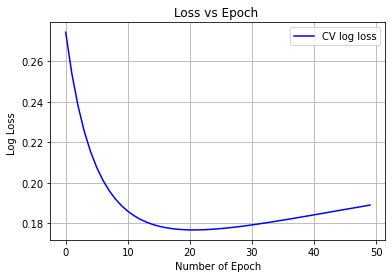

In [8]:
x = np.array([i for i in range(0, 50)])

train_log_loss_arr = np.array(cv_log_loss)

plt.plot(x, train_log_loss_arr, "-b", label = 'Train log loss')

plt.legend(loc="upper right")
plt.grid()

plt.xlabel('Number of Epoch')
plt.ylabel('Log Loss ')

plt.title('Loss vs Epoch ')
plt.show()